In [16]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   --------------------------- ------------ 30.7/44.8 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 276.2 kB/s eta 0:00:00


In [5]:
import pymysql

In [6]:
import seaborn as sns

In [7]:
from matplotlib import pyplot as plt

In [9]:
import pandas as pd

In [11]:
connection=pymysql.connect(host="127.0.0.1",user="root",password="Soumya@143",database="minicapstone")

In [12]:
query="select * from crime_data"

In [14]:
df=pd.read_sql(query,connection)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14060\3823902772.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [15]:
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [69]:
                   
                   #1) where are the geographical hotspots for reported crimes?

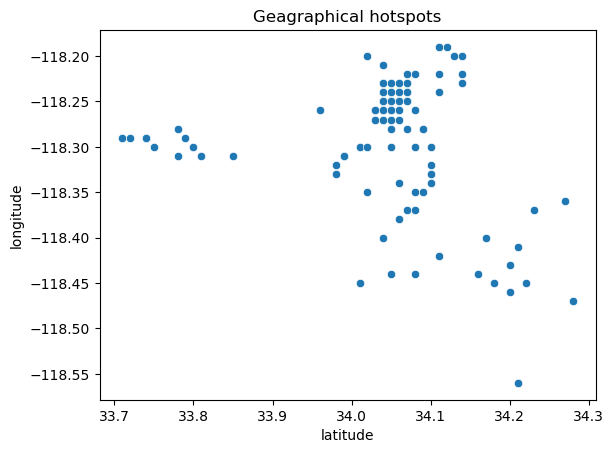

In [206]:
query='select LAT,LON from crime_data'
df=pd.read_sql(query,connection)

sns.scatterplot(x='LAT', y='LON',data=df)
plt.title("Geagraphical hotspots")
plt.xlabel("latitude")
plt.ylabel("longitude") 
plt.show()


In [41]:
                 
    
                     #2) what is the distribution of victim ages in reported crimes?
        

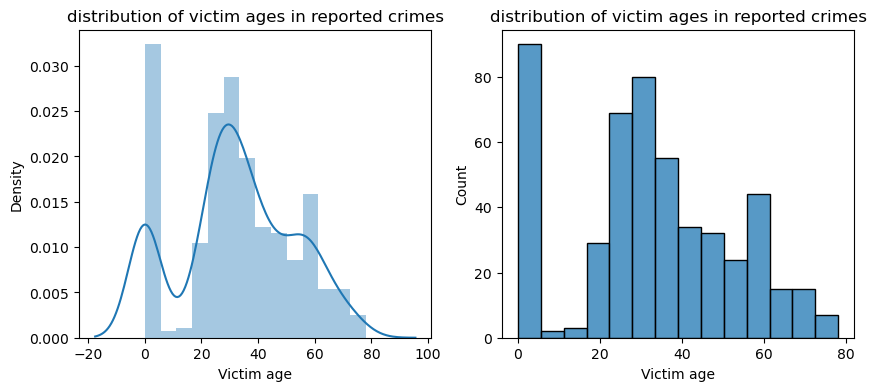

In [197]:
query='''select Vict_Age from crime_data
           where Vict_Age  is not null '''
df=pd.read_sql(query,connection)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('distribution of victim ages in reported crimes')
sns.distplot(df['Vict_Age'])
plt.xlabel('Victim age')
plt.subplot(1,2,2)
plt.title('distribution of victim ages in reported crimes')
sns.histplot(df['Vict_Age'])
plt.xlabel('Victim age')
plt.show()

In [65]:
       
    
             #3) is there a significant difference in crime rates between male and female victims?
        

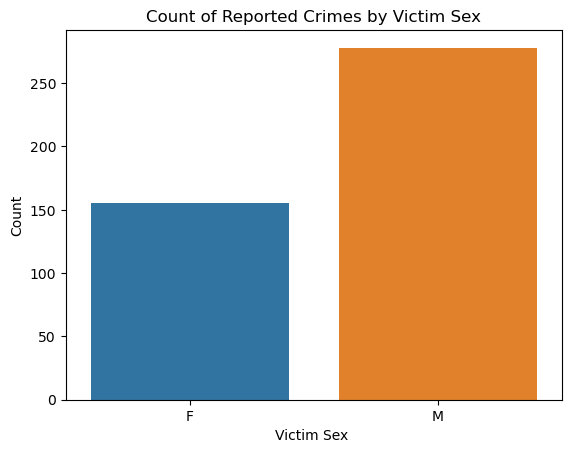

In [198]:
query = '''SELECT Crm_Cd, Vict_Sex FROM crime_data 
           WHERE Vict_Sex = "M" OR Vict_Sex = "F"'''
df = pd.read_sql(query, connection)

sns.countplot(x='Vict_Sex', data=df)
plt.xlabel('Victim Sex ')
plt.ylabel('Count')
plt.title('Count of Reported Crimes by Victim Sex')
plt.show()

In [126]:
row_count = len(df)
print("Number of rows:", row_count)

Number of rows: 433


In [140]:
                  
                    #4)where do most crimes occur based on the 'location' column?
    
    

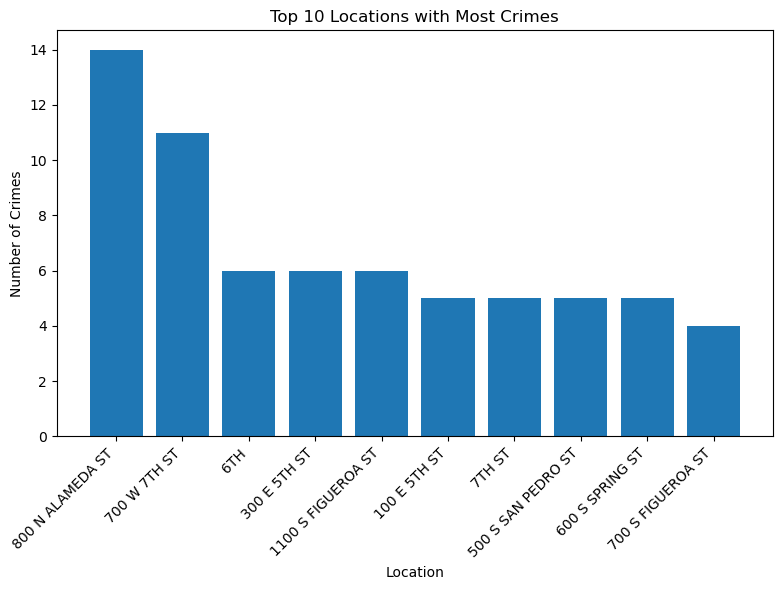

In [207]:
query = '''
    SELECT Location, COUNT(*) AS crime_count
    FROM crime_data
    GROUP BY location
    ORDER BY crime_count DESC
'''

# Execute the query and read data into DataFrame
df = pd.read_sql(query, connection)

# Close the database connection


# Plot the locations where most crimes occur
plt.figure(figsize=(8, 6))
plt.bar(df['Location'][:10], df['crime_count'][:10])
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Locations with Most Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
                   
    
                    #5)what is the distribution of reported crimes based on Crime Code?
        

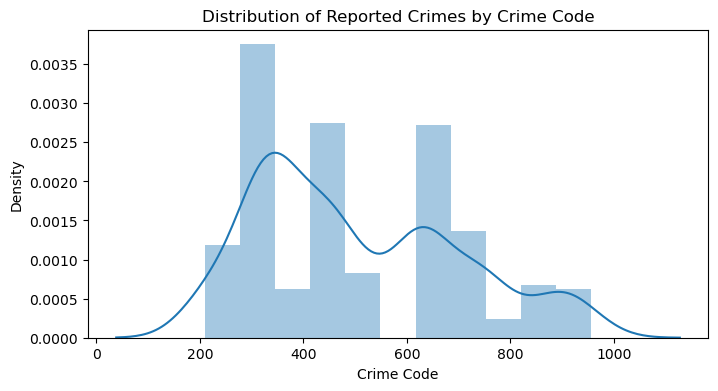

In [194]:
query='''select Crm_Cd from crime_data
          order by Crm_Cd'''
df=pd.read_sql(query,connection)

plt.figure(figsize=(8,4))
sns.distplot(df['Crm_Cd'])
plt.xlabel('Crime Code')

plt.title('Distribution of Reported Crimes by Crime Code')

plt.show()

In [208]:
df.describe()

,crime_count
count,365.000000
mean,1.367123
std,1.177637
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000
